## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0094436	total: 58.5ms	remaining: 58.5s
1:	learn: 0.9899531	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9694295	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9512024	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9323541	total: 62.6ms	remaining: 12.4s
5:	learn: 0.9145796	total: 63.5ms	remaining: 10.5s
6:	learn: 0.8999506	total: 64.4ms	remaining: 9.13s
7:	learn: 0.8827686	total: 65.3ms	remaining: 8.09s
8:	learn: 0.8671530	total: 66.1ms	remaining: 7.27s
9:	learn: 0.8496660	total: 66.9ms	remaining: 6.62s
10:	learn: 0.8343006	total: 67.8ms	remaining: 6.1s
11:	learn: 0.8193593	total: 68.6ms	remaining: 5.65s
12:	learn: 0.8041266	total: 69.4ms	remaining: 5.27s
13:	learn: 0.7887206	total: 70.2ms	remaining: 4.95s
14:	learn: 0.7754618	total: 71ms	remaining: 4.67s
15:	learn: 0.7613528	total: 71.8ms	remaining: 4.42s
16:	learn: 0.7493426	total: 72.7ms	remaining: 4.2s
17:	learn: 0.7368239	total: 73.5ms	remaining: 4.01s
18:	learn: 0.7236784	total: 74.3ms	remaining: 3.

61:	learn: 0.4086339	total: 110ms	remaining: 1.66s
62:	learn: 0.4050648	total: 111ms	remaining: 1.64s
63:	learn: 0.4015515	total: 111ms	remaining: 1.63s
64:	learn: 0.3972961	total: 112ms	remaining: 1.61s
65:	learn: 0.3936779	total: 113ms	remaining: 1.6s
66:	learn: 0.3897199	total: 114ms	remaining: 1.59s
67:	learn: 0.3858817	total: 115ms	remaining: 1.57s
68:	learn: 0.3812618	total: 116ms	remaining: 1.56s
69:	learn: 0.3775602	total: 117ms	remaining: 1.55s
70:	learn: 0.3751350	total: 118ms	remaining: 1.54s
71:	learn: 0.3720684	total: 118ms	remaining: 1.52s
72:	learn: 0.3688637	total: 119ms	remaining: 1.51s
73:	learn: 0.3654819	total: 120ms	remaining: 1.5s
74:	learn: 0.3625010	total: 121ms	remaining: 1.49s
75:	learn: 0.3585055	total: 122ms	remaining: 1.48s
76:	learn: 0.3562020	total: 123ms	remaining: 1.47s
77:	learn: 0.3532435	total: 123ms	remaining: 1.46s
78:	learn: 0.3507250	total: 124ms	remaining: 1.45s
79:	learn: 0.3478101	total: 125ms	remaining: 1.44s
80:	learn: 0.3450620	total: 126ms

157:	learn: 0.2406905	total: 192ms	remaining: 1.02s
158:	learn: 0.2398352	total: 193ms	remaining: 1.02s
159:	learn: 0.2390793	total: 194ms	remaining: 1.02s
160:	learn: 0.2383208	total: 194ms	remaining: 1.01s
161:	learn: 0.2376048	total: 195ms	remaining: 1.01s
162:	learn: 0.2369750	total: 196ms	remaining: 1.01s
163:	learn: 0.2362866	total: 197ms	remaining: 1s
164:	learn: 0.2353774	total: 198ms	remaining: 1000ms
165:	learn: 0.2346802	total: 198ms	remaining: 997ms
166:	learn: 0.2341344	total: 199ms	remaining: 994ms
167:	learn: 0.2332286	total: 200ms	remaining: 991ms
168:	learn: 0.2325286	total: 201ms	remaining: 988ms
169:	learn: 0.2318679	total: 202ms	remaining: 986ms
170:	learn: 0.2312258	total: 203ms	remaining: 983ms
171:	learn: 0.2306210	total: 204ms	remaining: 980ms
172:	learn: 0.2300577	total: 204ms	remaining: 977ms
173:	learn: 0.2293281	total: 205ms	remaining: 974ms
174:	learn: 0.2286752	total: 206ms	remaining: 972ms
175:	learn: 0.2280738	total: 207ms	remaining: 969ms
176:	learn: 0.

288:	learn: 0.1708578	total: 300ms	remaining: 738ms
289:	learn: 0.1705284	total: 301ms	remaining: 736ms
290:	learn: 0.1700921	total: 302ms	remaining: 735ms
291:	learn: 0.1696148	total: 303ms	remaining: 734ms
292:	learn: 0.1694560	total: 303ms	remaining: 732ms
293:	learn: 0.1689538	total: 304ms	remaining: 730ms
294:	learn: 0.1685219	total: 305ms	remaining: 729ms
295:	learn: 0.1683758	total: 306ms	remaining: 727ms
296:	learn: 0.1679136	total: 307ms	remaining: 726ms
297:	learn: 0.1672144	total: 307ms	remaining: 724ms
298:	learn: 0.1669084	total: 308ms	remaining: 723ms
299:	learn: 0.1665662	total: 309ms	remaining: 721ms
300:	learn: 0.1660888	total: 310ms	remaining: 720ms
301:	learn: 0.1658206	total: 311ms	remaining: 718ms
302:	learn: 0.1654578	total: 312ms	remaining: 717ms
303:	learn: 0.1649912	total: 312ms	remaining: 715ms
304:	learn: 0.1645151	total: 313ms	remaining: 714ms
305:	learn: 0.1640525	total: 314ms	remaining: 712ms
306:	learn: 0.1635335	total: 315ms	remaining: 710ms
307:	learn: 

387:	learn: 0.1422660	total: 382ms	remaining: 603ms
388:	learn: 0.1419078	total: 383ms	remaining: 602ms
389:	learn: 0.1415575	total: 384ms	remaining: 601ms
390:	learn: 0.1413778	total: 385ms	remaining: 599ms
391:	learn: 0.1410096	total: 386ms	remaining: 598ms
392:	learn: 0.1407347	total: 387ms	remaining: 597ms
393:	learn: 0.1404109	total: 388ms	remaining: 596ms
394:	learn: 0.1403181	total: 388ms	remaining: 595ms
395:	learn: 0.1401304	total: 389ms	remaining: 594ms
396:	learn: 0.1397964	total: 390ms	remaining: 592ms
397:	learn: 0.1394749	total: 391ms	remaining: 591ms
398:	learn: 0.1391101	total: 391ms	remaining: 590ms
399:	learn: 0.1389037	total: 392ms	remaining: 588ms
400:	learn: 0.1386669	total: 393ms	remaining: 587ms
401:	learn: 0.1382823	total: 394ms	remaining: 586ms
402:	learn: 0.1380587	total: 395ms	remaining: 585ms
403:	learn: 0.1377531	total: 396ms	remaining: 584ms
404:	learn: 0.1374710	total: 396ms	remaining: 582ms
405:	learn: 0.1371305	total: 398ms	remaining: 582ms
406:	learn: 

517:	learn: 0.1137238	total: 490ms	remaining: 456ms
518:	learn: 0.1134682	total: 491ms	remaining: 455ms
519:	learn: 0.1133817	total: 492ms	remaining: 454ms
520:	learn: 0.1131227	total: 493ms	remaining: 453ms
521:	learn: 0.1129050	total: 494ms	remaining: 452ms
522:	learn: 0.1128409	total: 495ms	remaining: 451ms
523:	learn: 0.1127927	total: 495ms	remaining: 450ms
524:	learn: 0.1127317	total: 496ms	remaining: 449ms
525:	learn: 0.1125892	total: 497ms	remaining: 448ms
526:	learn: 0.1122442	total: 498ms	remaining: 447ms
527:	learn: 0.1122030	total: 499ms	remaining: 446ms
528:	learn: 0.1120113	total: 500ms	remaining: 445ms
529:	learn: 0.1118505	total: 501ms	remaining: 444ms
530:	learn: 0.1118155	total: 501ms	remaining: 443ms
531:	learn: 0.1116016	total: 502ms	remaining: 442ms
532:	learn: 0.1113013	total: 503ms	remaining: 441ms
533:	learn: 0.1111474	total: 504ms	remaining: 440ms
534:	learn: 0.1109631	total: 505ms	remaining: 439ms
535:	learn: 0.1106400	total: 506ms	remaining: 438ms
536:	learn: 

616:	learn: 0.0977557	total: 572ms	remaining: 355ms
617:	learn: 0.0975989	total: 573ms	remaining: 354ms
618:	learn: 0.0974176	total: 574ms	remaining: 353ms
619:	learn: 0.0972789	total: 575ms	remaining: 352ms
620:	learn: 0.0971901	total: 576ms	remaining: 351ms
621:	learn: 0.0970527	total: 577ms	remaining: 351ms
622:	learn: 0.0968580	total: 578ms	remaining: 350ms
623:	learn: 0.0967364	total: 578ms	remaining: 349ms
624:	learn: 0.0964842	total: 579ms	remaining: 348ms
625:	learn: 0.0963819	total: 580ms	remaining: 346ms
626:	learn: 0.0963045	total: 581ms	remaining: 345ms
627:	learn: 0.0962321	total: 581ms	remaining: 344ms
628:	learn: 0.0960956	total: 582ms	remaining: 343ms
629:	learn: 0.0960184	total: 583ms	remaining: 342ms
630:	learn: 0.0959584	total: 584ms	remaining: 341ms
631:	learn: 0.0957988	total: 585ms	remaining: 341ms
632:	learn: 0.0957410	total: 586ms	remaining: 340ms
633:	learn: 0.0957199	total: 587ms	remaining: 339ms
634:	learn: 0.0955200	total: 587ms	remaining: 338ms
635:	learn: 

744:	learn: 0.0812534	total: 681ms	remaining: 233ms
745:	learn: 0.0812405	total: 682ms	remaining: 232ms
746:	learn: 0.0811468	total: 683ms	remaining: 231ms
747:	learn: 0.0811205	total: 683ms	remaining: 230ms
748:	learn: 0.0809715	total: 684ms	remaining: 229ms
749:	learn: 0.0807904	total: 685ms	remaining: 228ms
750:	learn: 0.0807054	total: 686ms	remaining: 227ms
751:	learn: 0.0805367	total: 687ms	remaining: 227ms
752:	learn: 0.0804007	total: 688ms	remaining: 226ms
753:	learn: 0.0802811	total: 688ms	remaining: 225ms
754:	learn: 0.0802654	total: 689ms	remaining: 224ms
755:	learn: 0.0800618	total: 690ms	remaining: 223ms
756:	learn: 0.0798738	total: 691ms	remaining: 222ms
757:	learn: 0.0798146	total: 691ms	remaining: 221ms
758:	learn: 0.0796885	total: 692ms	remaining: 220ms
759:	learn: 0.0794987	total: 693ms	remaining: 219ms
760:	learn: 0.0792749	total: 694ms	remaining: 218ms
761:	learn: 0.0791919	total: 695ms	remaining: 217ms
762:	learn: 0.0790780	total: 695ms	remaining: 216ms
763:	learn: 

843:	learn: 0.0704740	total: 762ms	remaining: 141ms
844:	learn: 0.0703469	total: 763ms	remaining: 140ms
845:	learn: 0.0702315	total: 764ms	remaining: 139ms
846:	learn: 0.0700449	total: 765ms	remaining: 138ms
847:	learn: 0.0699138	total: 766ms	remaining: 137ms
848:	learn: 0.0698014	total: 767ms	remaining: 136ms
849:	learn: 0.0697304	total: 767ms	remaining: 135ms
850:	learn: 0.0696106	total: 768ms	remaining: 135ms
851:	learn: 0.0695989	total: 769ms	remaining: 134ms
852:	learn: 0.0694089	total: 770ms	remaining: 133ms
853:	learn: 0.0693201	total: 771ms	remaining: 132ms
854:	learn: 0.0692154	total: 771ms	remaining: 131ms
855:	learn: 0.0691837	total: 772ms	remaining: 130ms
856:	learn: 0.0690255	total: 773ms	remaining: 129ms
857:	learn: 0.0689914	total: 774ms	remaining: 128ms
858:	learn: 0.0688701	total: 775ms	remaining: 127ms
859:	learn: 0.0687237	total: 775ms	remaining: 126ms
860:	learn: 0.0686402	total: 776ms	remaining: 125ms
861:	learn: 0.0685388	total: 777ms	remaining: 124ms
862:	learn: 

974:	learn: 0.0588720	total: 871ms	remaining: 22.3ms
975:	learn: 0.0587949	total: 872ms	remaining: 21.4ms
976:	learn: 0.0586495	total: 873ms	remaining: 20.5ms
977:	learn: 0.0585970	total: 874ms	remaining: 19.7ms
978:	learn: 0.0585110	total: 875ms	remaining: 18.8ms
979:	learn: 0.0584641	total: 875ms	remaining: 17.9ms
980:	learn: 0.0584020	total: 876ms	remaining: 17ms
981:	learn: 0.0582916	total: 877ms	remaining: 16.1ms
982:	learn: 0.0581471	total: 878ms	remaining: 15.2ms
983:	learn: 0.0581032	total: 879ms	remaining: 14.3ms
984:	learn: 0.0579963	total: 880ms	remaining: 13.4ms
985:	learn: 0.0578964	total: 881ms	remaining: 12.5ms
986:	learn: 0.0578045	total: 882ms	remaining: 11.6ms
987:	learn: 0.0577922	total: 882ms	remaining: 10.7ms
988:	learn: 0.0577136	total: 883ms	remaining: 9.82ms
989:	learn: 0.0576655	total: 884ms	remaining: 8.93ms
990:	learn: 0.0575789	total: 885ms	remaining: 8.03ms
991:	learn: 0.0575288	total: 885ms	remaining: 7.14ms
992:	learn: 0.0574123	total: 886ms	remaining: 6.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

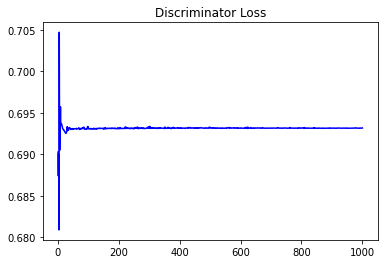

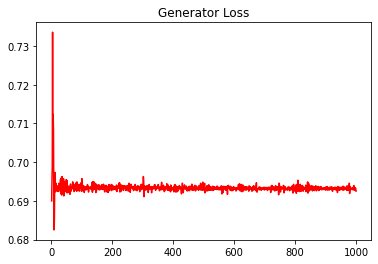

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10893077226873352


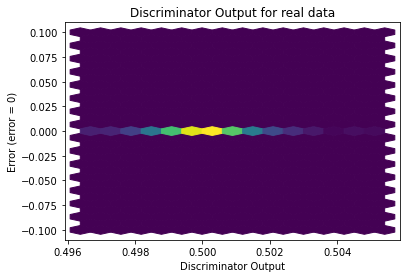

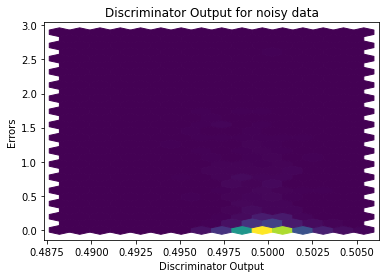

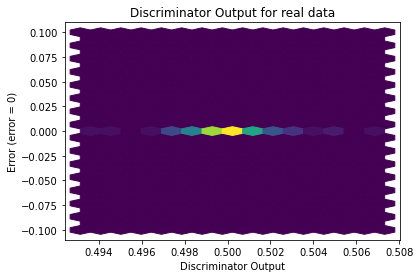

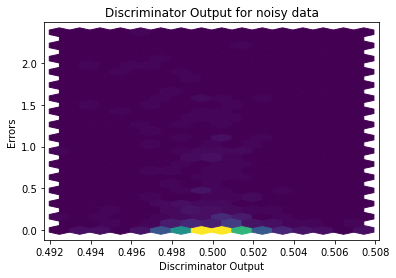

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


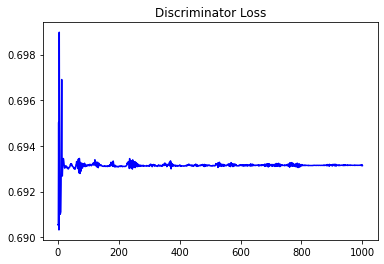

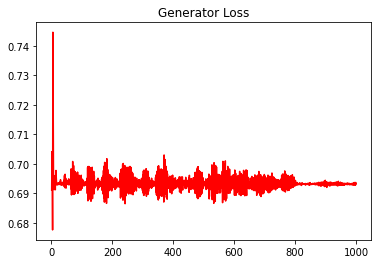

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08893821884065367


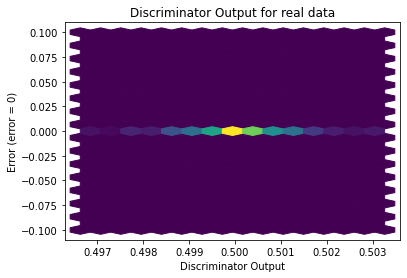

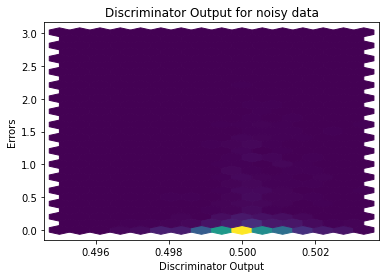

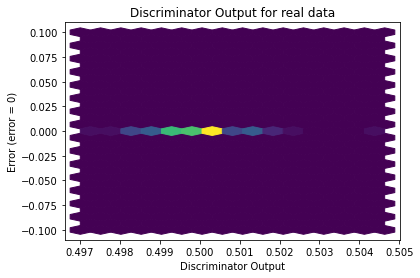

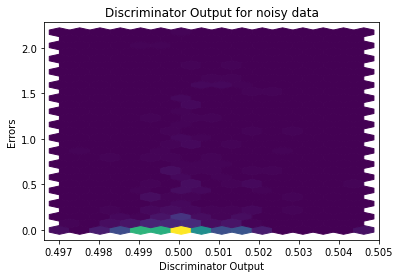

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1389]], requires_grad=True)
